<a href="https://colab.research.google.com/github/Khushil-Modi/SJSU/blob/main/CMPE_255_Clustering_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

#Loading IRIS Dataset

In [2]:
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
data = iris.data
data.shape

(150, 4)

In [4]:
import pandas as pd
x = pd.DataFrame(data, columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width'])
x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#Plotting Dataset

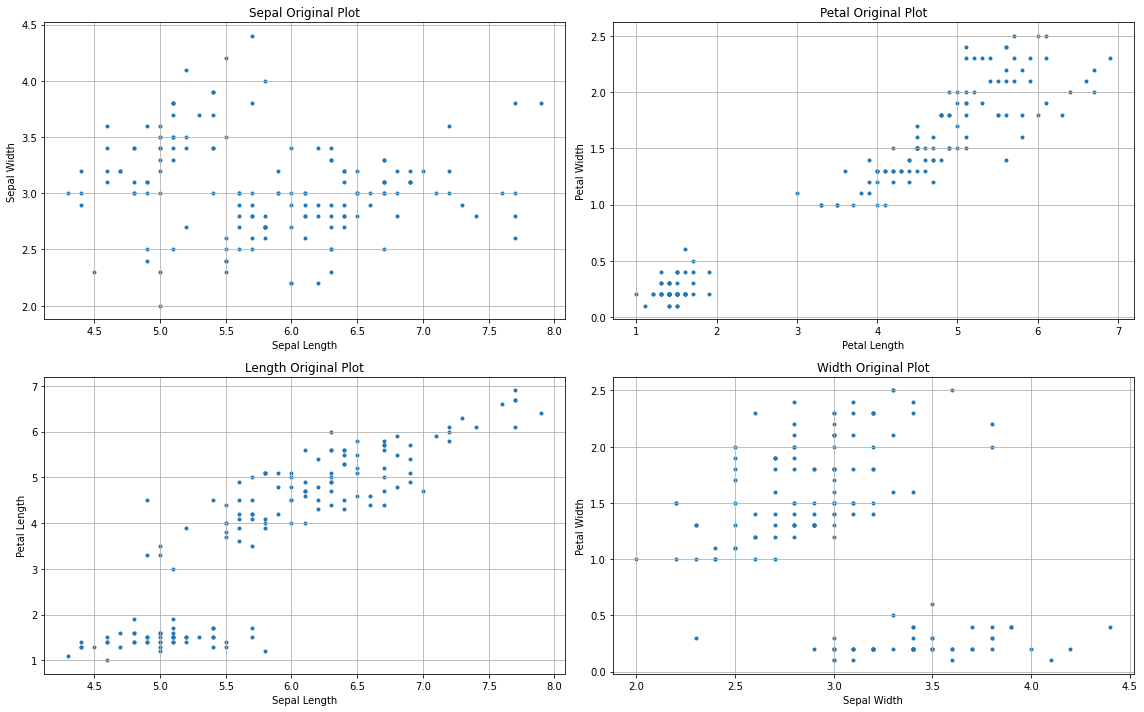

In [5]:
plt.figure(figsize=(16,10))
#scatter plot of sepal length vs sepal width 
plt.subplot(2,2,1)                                   
plt.scatter(list(x.iloc[:,0]), list(x.iloc[:,1]), marker='.')                                                                        
plt.xlabel('Sepal Length')                                                 
plt.ylabel('Sepal Width')                                         
plt.title('Sepal Original Plot')
plt.grid()                                                                                           
plt.tight_layout()

#scatter plot of petal length vs petal width
plt.subplot(2,2,2)                                   
plt.scatter(list(x.iloc[:,2]), list(x.iloc[:,3]), marker='.')                                                                        
plt.xlabel('Petal Length')                                                 
plt.ylabel('Petal Width')                                                 
plt.title('Petal Original Plot')                                           
plt.grid()                                                                 
plt.tight_layout()


#scatter plot of petal length vs sepal length
plt.subplot(2,2,3)                                   
plt.scatter(list(x.iloc[:,0]), list(x.iloc[:,2]), marker='.')                                                                       
plt.xlabel('Sepal Length')                                                 
plt.ylabel('Petal Length')                                                 
plt.title('Length Original Plot')                                           
plt.grid()                                                                 
plt.tight_layout()

#scatter plot of petal width vs sepal width
plt.subplot(2,2,4)                                   
plt.scatter(list(x.iloc[:,1]), list(x.iloc[:,3]), marker='.')                                                                       
plt.xlabel('Sepal Width')                                                 
plt.ylabel('Petal Width')                                                 
plt.title('Width Original Plot')                                            
plt.grid()                                                                 
plt.tight_layout()

#K-Means from Scratch

In [6]:
class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

In [7]:
k = KMeans(n_clusters=3).fit(data)
k.fit_transform(data)

array([[5.0595416 , 0.14135063, 3.41925061],
       [5.11494335, 0.44763825, 3.39857426],
       [5.27935534, 0.4171091 , 3.56935666],
       [5.15358977, 0.52533799, 3.42240962],
       [5.10433388, 0.18862662, 3.46726403],
       [4.68148797, 0.67703767, 3.14673162],
       [5.21147652, 0.4151867 , 3.51650264],
       [5.00252706, 0.06618157, 3.33654987],
       [5.32798107, 0.80745278, 3.57233779],
       [5.06790865, 0.37627118, 3.3583767 ],
       [4.89806763, 0.4824728 , 3.32449131],
       [4.9966845 , 0.25373214, 3.31126872],
       [5.19103612, 0.50077939, 3.46661272],
       [5.65173594, 0.91322505, 3.90578362],
       [5.10804455, 1.01409073, 3.646649  ],
       [4.88564095, 1.20481534, 3.49427881],
       [5.03090587, 0.6542018 , 3.495248  ],
       [5.02342022, 0.1441527 , 3.38444981],
       [4.61792995, 0.82436642, 3.11245944],
       [4.97213426, 0.38933276, 3.37738931],
       [4.6955761 , 0.46344363, 3.07471224],
       [4.9236821 , 0.3286031 , 3.31506588],
       [5.

In [8]:
k.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [9]:
y_k = k.fit_predict(data)

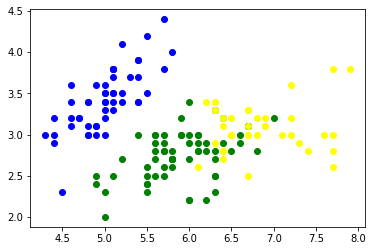

In [10]:
plt.scatter(data[y_k ==0,0],data[y_k==0,1],c='green')
plt.scatter(data[y_k ==1,0],data[y_k==1,1],c='blue')
plt.scatter(data[y_k ==2,0],data[y_k==2,1],c='yellow')

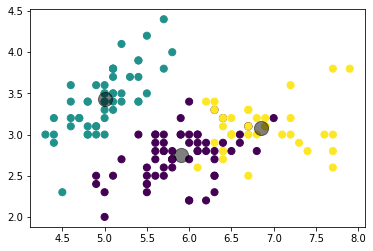

In [11]:
plt.scatter(data[:, 0], data[:, 1], c=y_k, s=50, cmap='viridis')
centers = k.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Text(0, 0.5, 'WCSS')

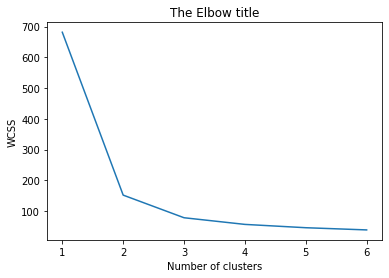

In [12]:
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(data)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#Hierachical Clustering

In [13]:
import sklearn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

#Single link

In [14]:
hcs = AgglomerativeClustering(linkage='single',n_clusters=3).fit(data)
hcs.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
y_hcs = hcs.fit_predict(data)

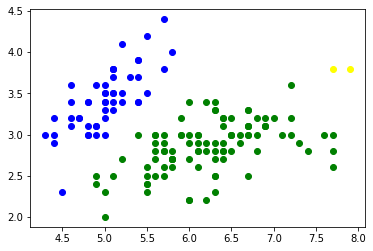

In [16]:
plt.scatter(data[y_hcs ==0,0],data[y_hcs==0,1],c='green')
plt.scatter(data[y_hcs ==1,0],data[y_hcs==1,1],c='blue')
plt.scatter(data[y_hcs ==2,0],data[y_hcs==2,1],c='yellow')

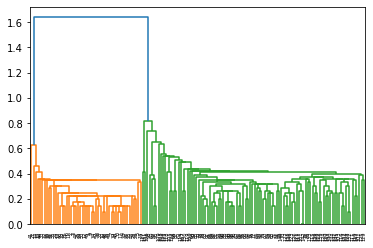

In [17]:
dendrogram = sch.dendrogram(sch.linkage(data,method='single'))

#Complete Link

In [18]:
hcc = AgglomerativeClustering(linkage='complete',n_clusters=3).fit(data)
hcc.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
y_hcc = hcc.fit_predict(data)

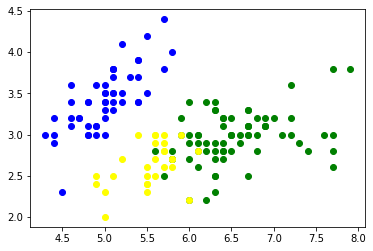

In [20]:
plt.scatter(data[y_hcc ==0,0],data[y_hcc==0,1],c='green')
plt.scatter(data[y_hcc ==1,0],data[y_hcc==1,1],c='blue')
plt.scatter(data[y_hcc ==2,0],data[y_hcc==2,1],c='yellow')

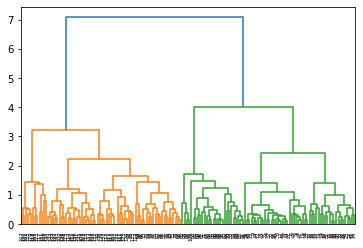

In [21]:
dendrogram = sch.dendrogram(sch.linkage(data,method='complete'))

#Average Link

In [22]:
hca = AgglomerativeClustering(linkage='average',n_clusters=3).fit(data)
hca.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [23]:
y_hca = hca.fit_predict(data)

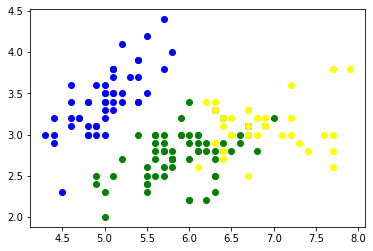

In [24]:
plt.scatter(data[y_hca ==0,0],data[y_hca==0,1],c='green')
plt.scatter(data[y_hca ==1,0],data[y_hca==1,1],c='blue')
plt.scatter(data[y_hca ==2,0],data[y_hca==2,1],c='yellow')

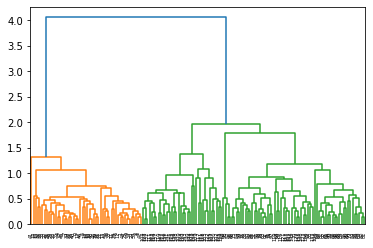

In [25]:
dendrogram = sch.dendrogram(sch.linkage(data,method='average'))

#Gaussian Mixture Model Clustering

In [26]:
from sklearn.mixture import GaussianMixture

In [27]:
gmm = GaussianMixture(n_components=3).fit(data)
y_gmm = gmm.fit_predict(data)
y_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

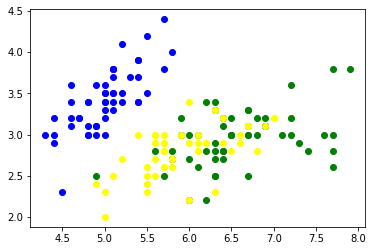

In [28]:
plt.scatter(data[y_gmm ==0,0],data[y_gmm==0,1],c='green')
plt.scatter(data[y_gmm ==1,0],data[y_gmm==1,1],c='blue')
plt.scatter(data[y_gmm ==2,0],data[y_gmm==2,1],c='yellow')

#Setup Pycaret

In [71]:
!pip install pycaret

In [85]:
!pip install --upgrade numpy

     |████████████████████████████████| 15.7 MB 4.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
pycaret 2.3.5 requires numpy==1.19.5, but you have numpy 1.21.4 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


#DB Scan Clustering using PyCaret

In [29]:
# Importing module and initializing setup
from pycaret.datasets import get_data

In [30]:
dataset = get_data("iris")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
from pycaret.clustering import *

In [34]:
clust = setup(data=x)

,Description,Value
0,session_id,5031
1,Original Data,"(150, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(150, 4)"
9,CPU Jobs,-1


In [35]:
dbscan = create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.486,220.2976,7.2225,0,0,0


In [36]:
dbscan_df = assign_model(dbscan)

In [37]:
plot_model(dbscan, plot = 'cluster')

In [38]:
plot_model(dbscan, plot = 'tsne')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

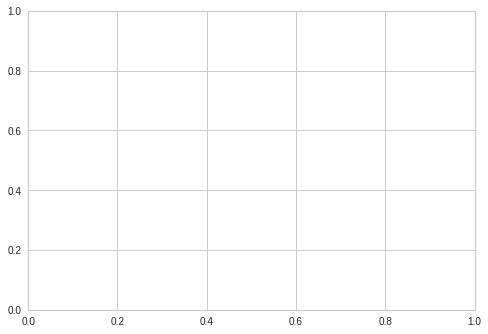

In [39]:
evaluate_model(dbscan)

#DB Dcan without Pycaret

In [49]:
from sklearn.cluster import DBSCAN

In [42]:
dbs = DBSCAN().fit(data)
dbs.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [43]:
y_dbs = dbs.fit_predict(data)

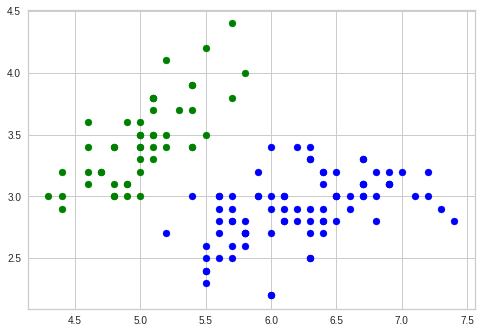

In [44]:
plt.scatter(data[y_dbs ==0,0],data[y_dbs==0,1],c='green')
plt.scatter(data[y_dbs ==1,0],data[y_dbs==1,1],c='blue')
plt.scatter(data[y_dbs ==2,0],data[y_dbs==2,1],c='yellow')

#References
#####https://pythonprogramming.net/k-means-from-scratch-machine-learning-tutorial/
#####https://www.youtube.com/watch?v=wzqA8ztUyqI&ab_channel=prabhanjantrivedi
#####https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/
#####https://pycaret.readthedocs.io/en/latest/api/clustering.html